<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Microplastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns

In [ ]:
MP_file = '/content/drive/MyDrive/Data/Microplastic_Water.xlsx'
MP_df = pd.read_excel(MP_file, sheet_name='Analysis')
filtered_MP_df = MP_df[MP_df['Station No'].str.contains('St', na=False)]
print (filtered_MP_df)

  Station No  Latitude  Longitude  Weight  Percentage_Station  Station_total  \
0      St 01   20.6325    92.3300  0.0508           11.276102          243.0   
1      St 02   20.6106    92.3492  0.0522            5.475638          118.0   
2      St 03   20.5889    92.3486  0.0536            8.770302          189.0   
3      St 04   20.5746    92.3463  0.0473           12.621810          272.0   
4      St 05   20.5736    92.3336  0.0525           14.477958          312.0   
5      St 06   20.6394    92.3183  0.0535            2.505800           54.0   
6      St 07   20.6400    92.2986  0.0554           13.225058          285.0   
7      St 08   20.6114    92.3097  0.0517           12.157773          262.0   
8      St 09   20.5872    92.3228  0.0586           14.477958          312.0   
9      St 10   20.5719    92.3272  0.0582            5.011601          108.0   

   Abundance  Fiber  Percentage of Fiber  Fiber Size  ...  \
0     2430.0  213.0            87.654321    158.1810  ... 

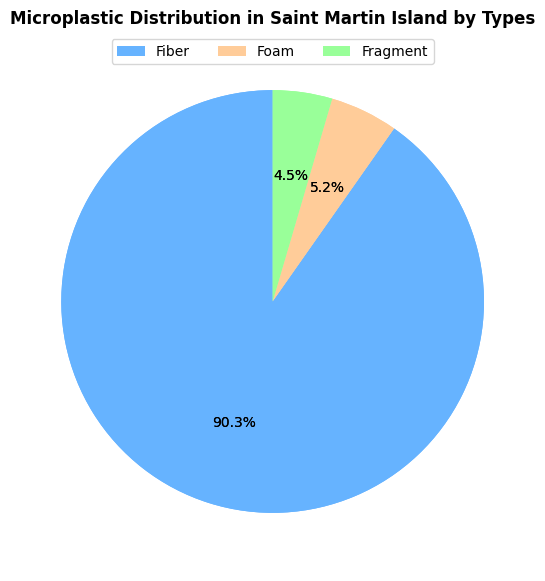

In [ ]:
microplastic_types = ['Fiber', 'Foam', 'Fragment']
counts = [1945, 112, 98]
colors = ['#66b3ff', '#ffcc99', '#99ff99']

plt.figure(figsize=(6, 7))
patches, texts, autotexts = plt.pie(counts, autopct='%1.1f%%', startangle=90, colors=colors)
plt.pie(counts, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Microplastic Distribution in Saint Martin Island by Types', loc='center', fontweight='bold')
plt.legend(patches, microplastic_types, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1))

plt.axis('equal')
plt.show()

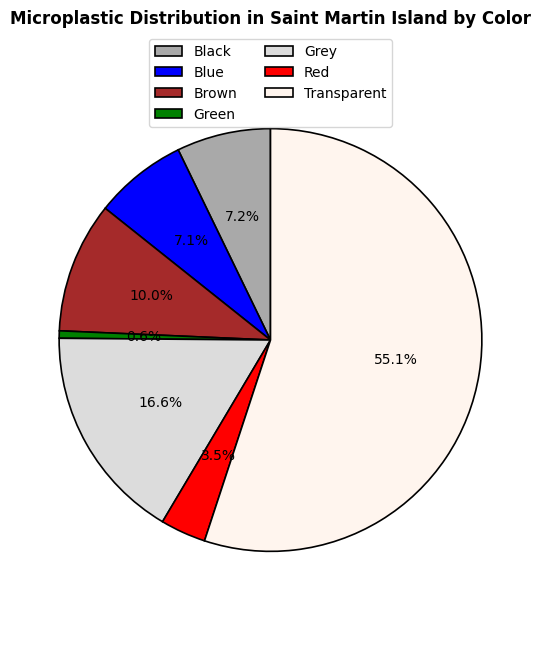

In [ ]:
microplastic_Color = ['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Red', 'Transparent']
counts = [153, 151, 213, 12, 353, 74, 1171]
colors = ['darkgrey', 'blue', 'brown', 'green', 'gainsboro', 'red', 'seashell']

plt.figure(figsize=(6, 8))
wedgeprops = {'edgecolor': 'black', 'linewidth': 1.2}

patches, texts, autotexts = plt.pie(
    counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=wedgeprops
)

plt.title('Microplastic Distribution in Saint Martin Island by Color', loc='center', fontweight='bold')
plt.legend(patches, microplastic_Color, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1))

# Ensure the pie chart is circular
plt.axis('equal')

# Display the plot
plt.show()

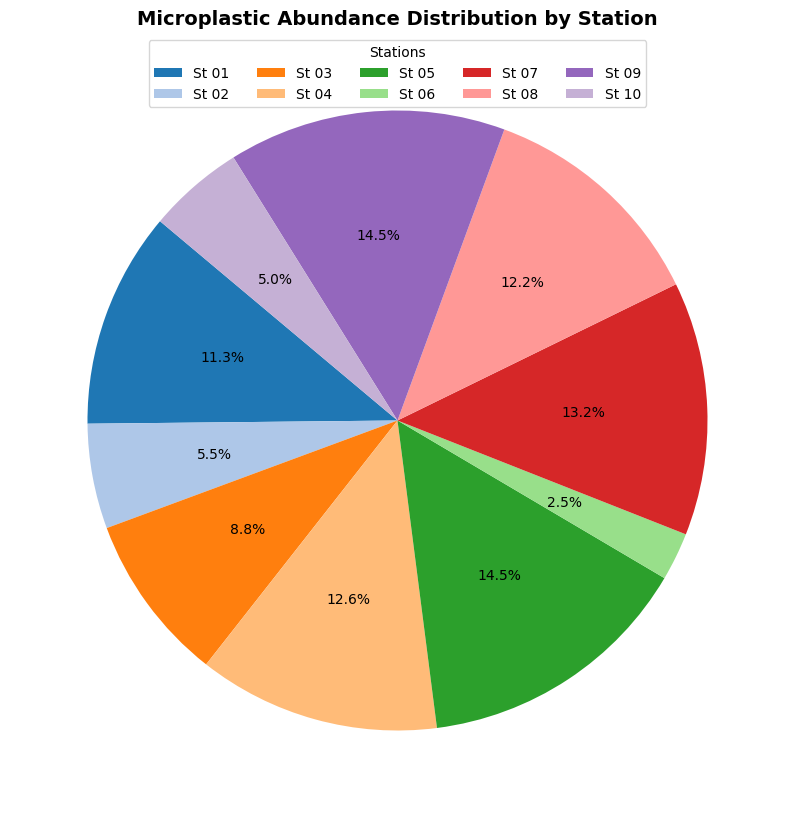

In [ ]:
stations = filtered_MP_df['Station No'].values
abundance = filtered_MP_df['Abundance'].values

# Create the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(abundance, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Add a legend
plt.legend(wedges, stations, title="Stations", loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1))
plt.title('Microplastic Abundance Distribution by Station', loc='center', fontsize=14, fontweight='bold', x=.5)
plt.subplots_adjust(top=1.5)
plt.show()

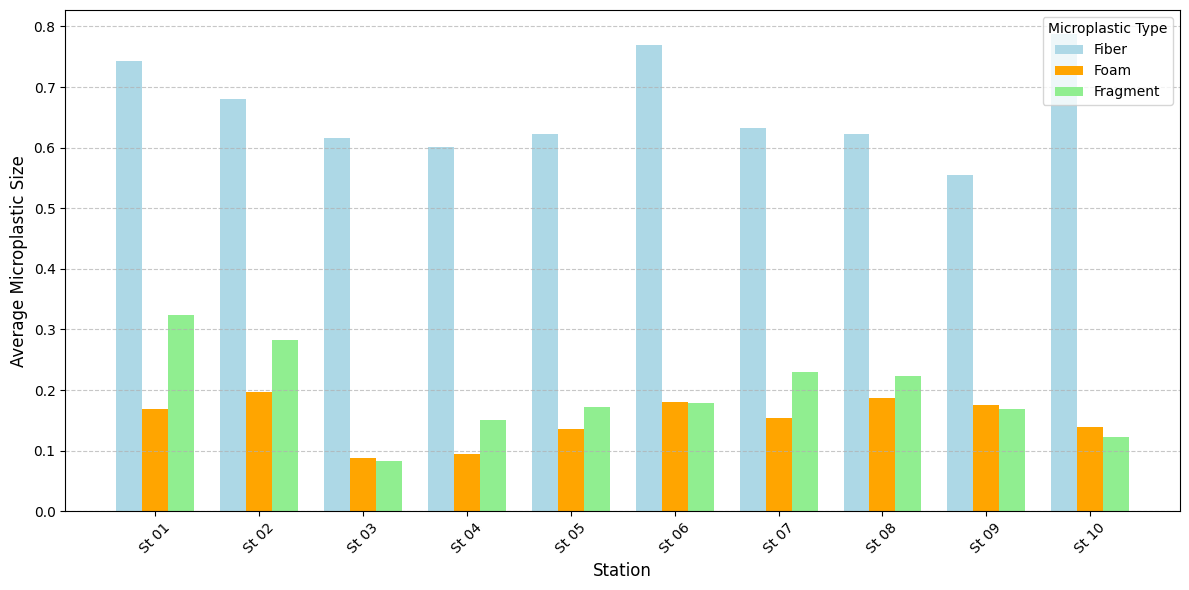

In [ ]:
bar_width = 0.25
stations = np.arange(len(filtered_MP_df['Station No']))  # Numeric positions for stations
Size_Fiber = filtered_MP_df['Average Size_Fiber'].values
Size_Foam = filtered_MP_df['Average Size_Foam'].values
Size_Fragment = filtered_MP_df['Average Size_Frag'].values

plt.figure(figsize=(12, 6))
plt.bar(stations - bar_width, Size_Fiber, width=bar_width, color='lightblue', label='Fiber')
plt.bar(stations, Size_Foam, width=bar_width, color='orange', label='Foam')
plt.bar(stations + bar_width, Size_Fragment, width=bar_width, color='lightgreen', label='Fragment')

plt.xlabel('Station', fontsize=12)
plt.ylabel('Average Microplastic Size', fontsize=12)
plt.xticks(stations, filtered_MP_df['Station No'], rotation=45)
plt.legend(title='Microplastic Type', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()